# 3R Planar Manipulator

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as stats

# 1. 3R planar manipulator (5 Points)

1. Derive the inverse kinematics solutions (1)
2. Generate a path in an XY plane and simulate the manipulator to trace this path in the XY plane for a fixed orientation (3) - [**SOLVED HERE**]
3. Discuss the singularity - assume the pose of the end-effector is given (1)

In [50]:
#1 (2)
#Animation
#Using sliders to give any arbitrary theta or length and visualize the location of each joint

from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

l1 = 5
l2 = 3
l3 = 2

def func(x, y, phi, l1, l2, l3):

    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x0, y0 = x - l3 * np.cos(phi), y - l3 * np.sin(phi)
    scale = 2 * l1 * np.sqrt(x0 * x0 + y0 * y0)

    A, B, C = - 2 * x0 * l1 / scale, - 2 * y0 * l1 / scale, (x0 * x0 + y0 * y0 + l1 * l1 - l2 * l2) / scale
    print("Value of C =", C, "If |C| <= 1 then real solutions exist.\n")

    theta1_1 = np.arccos(-C) + np.arctan2(B, A)
    theta1_2 = -np.arccos(-C) + np.arctan2(B, A)

    theta2_1 = np.arctan2((y0 - l1 * np.sin(theta1_1)) / l2, (x0 - l1 * np.cos(theta1_1)) / l2) - theta1_1
    theta2_2 = np.arctan2((y0 - l1 * np.sin(theta1_2)) / l2, (x0 - l1 * np.cos(theta1_2)) / l2) - theta1_2
    # print("Debugging...\nfirst:", (y0 - l1 * np.sin(theta1_1)) / l2, "second:", (x0 - l1 * np.cos(theta1_1) / l2),\
    #     "third:", np.arctan2((y0 - l1 * np.sin(theta1_1)) / l2, (x0 - l1 * np.cos(theta1_1) / l2)), "\n")

    theta3_1 = phi - theta1_1 - theta2_1
    theta3_2 = phi - theta1_2 - theta2_2
    print("Current x =", x, "y =", y, "phi =", phi, "x0 =", x0, "y0 =", y0, "\n")
    print("For sol1, theta1 =", theta1_1, "theta2 =", theta2_1, "theta3 =", theta3_1, "\n")
    print("For sol2, theta1 =", theta1_2, "theta2 =", theta2_2, "theta3 =", theta3_2, "\n")

    x_solution1, y_solution1, x_solution2, y_solution2 = np.zeros((3)), np.zeros((3)), np.zeros((3)), np.zeros((3))

    x_solution1[0], y_solution1[0] = l1 * math.cos(theta1_1), l1 * math.sin(theta1_1)
    x_solution1[1], y_solution1[1] = x_solution1[0] + l2*math.cos(theta1_1+theta2_1), y_solution1[0] + l2*math.sin(theta1_1+theta2_1)
    x_solution1[2], y_solution1[2] = x_solution1[1] + l3*math.cos(theta1_1+theta2_1+theta3_1), y_solution1[1] + l3*math.sin(theta1_1+theta2_1+theta3_1)

    x_solution2[0], y_solution2[0] = l1 * math.cos(theta1_2), l1 * math.sin(theta1_2)
    x_solution2[1], y_solution2[1] = x_solution2[0] + l2*math.cos(theta1_2+theta2_2), y_solution2[0] + l2*math.sin(theta1_2+theta2_2)
    x_solution2[2], y_solution2[2] = x_solution2[1] + l3*math.cos(theta1_2+theta2_2+theta3_2), y_solution2[1] + l3*math.sin(theta1_2+theta2_2+theta3_2)

    phi_1 = theta1_1 + theta2_1 + theta3_1
    phi_2 = theta1_2 + theta2_2 + theta3_2

    print("Sol1 : End effector coordinates x =", x_solution1[2], " y =", y_solution1[2], "phi =", phi_1, "\n")
    print("Sol2 : End effector coordinates x =", x_solution2[2], " y =", y_solution2[2], "phi =", phi_2, "\n")

    maxReachable = l1 + l2 + l3 + 5
    plt.xlim(-maxReachable, maxReachable)
    plt.ylim(-maxReachable, maxReachable)
    plt.grid()

    plt.plot(x_solution1[0], y_solution1[0], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="blue")
    plt.plot(x_solution1[1], y_solution1[1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="blue")
    plt.plot(x_solution1[2], y_solution1[2], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="blue")

    plt.plot(x_solution2[0], y_solution2[0], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="red")
    plt.plot(x_solution2[1], y_solution2[1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")
    plt.plot(x_solution2[2], y_solution2[2], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="red")

    line_1x = [0]
    for i in x_solution1:
        line_1x.append(i)

    line_1y = [0]
    for i in y_solution1:
        line_1y.append(i)

    line_2x = [0]
    for i in x_solution2:
        line_2x.append(i)

    line_2y = [0]
    for i in y_solution2:
        line_2y.append(i)

    print(line_2x, line_2y)


    plt.plot(line_1x, line_1y, linewidth = 2)
    plt.plot(line_2x, line_2y, linewidth = 2)

    plt.scatter(0, 0, color = "black")
    plt.show()
    


widgets.interactive(func, x = (0,10),y = (0,10), phi = (0,2*np.pi), l1 = (0, 30), l2 = (0, 20), l3 = (0, 10))

interactive(children=(IntSlider(value=5, description='x', max=10), IntSlider(value=5, description='y', max=10)…

Simulating the 3R manipulator to trace the pink path in the XY plane for a fixed orientation (0.4 radians)



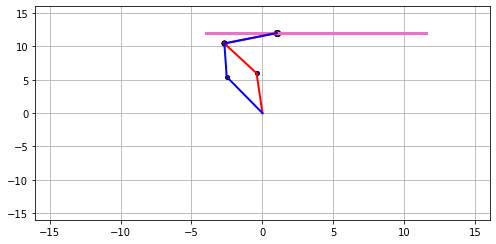

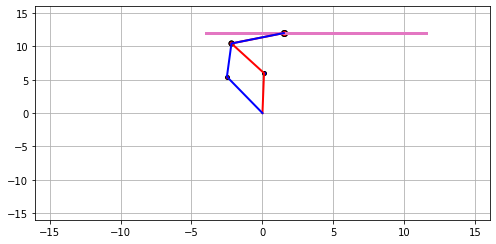

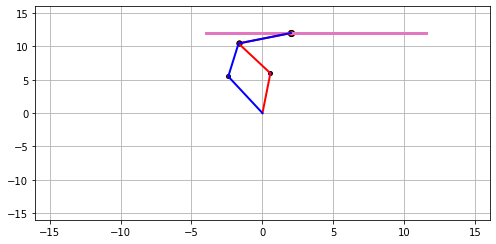

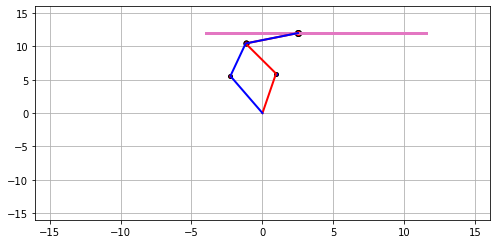

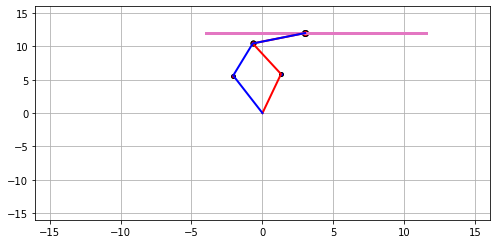

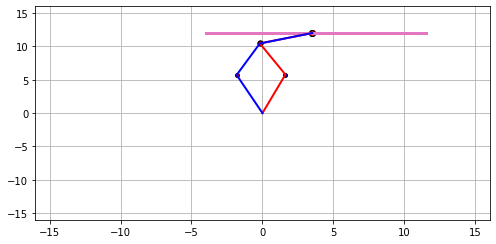

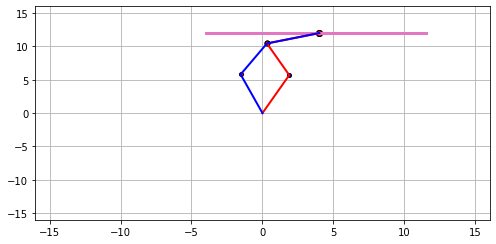

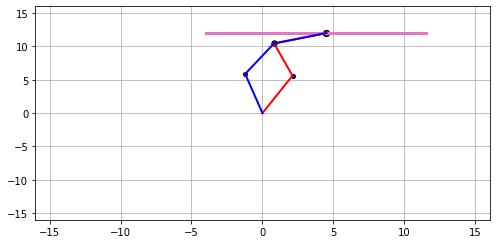

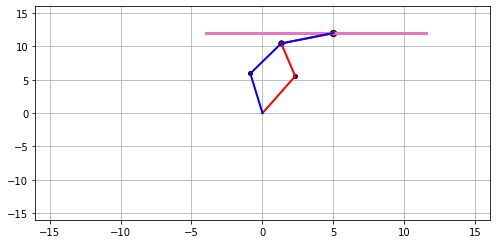

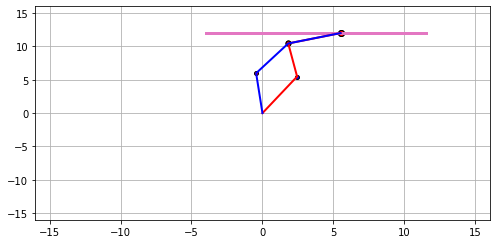

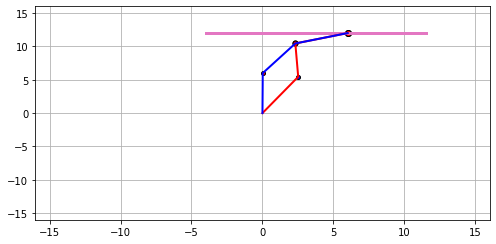

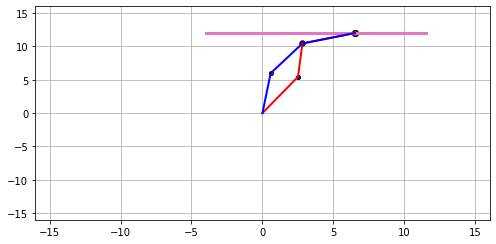

In [52]:
fig = plt.figure(0)
ax = fig.add_subplot(111)

    
def make_plot(x, y, phi, l1, l2, l3, pause_duration = 0.5):

    x0, y0 = x - l3 * np.cos(phi), y - l3 * np.sin(phi)
    scale = 2 * l1 * np.sqrt(x0 * x0 + y0 * y0)

    A, B, C = - 2 * x0 * l1 / scale, - 2 * y0 * l1 / scale, (x0 * x0 + y0 * y0 + l1 * l1 - l2 * l2) / scale

    theta1_1 = np.arccos(-C) + np.arctan2(B, A)
    theta1_2 = -np.arccos(-C) + np.arctan2(B, A)

    theta2_1 = np.arctan2((y0 - l1 * np.sin(theta1_1)) / l2, (x0 - l1 * np.cos(theta1_1)) / l2) - theta1_1
    theta2_2 = np.arctan2((y0 - l1 * np.sin(theta1_2)) / l2, (x0 - l1 * np.cos(theta1_2)) / l2) - theta1_2

    theta3_1 = phi - theta1_1 - theta2_1
    theta3_2 = phi - theta1_2 - theta2_2

    x_solution1, y_solution1, x_solution2, y_solution2 = np.zeros((3)), np.zeros((3)), np.zeros((3)), np.zeros((3))

    x_solution1[0], y_solution1[0] = l1 * math.cos(theta1_1), l1 * math.sin(theta1_1)
    x_solution1[1], y_solution1[1] = x_solution1[0] + l2*math.cos(theta1_1+theta2_1), y_solution1[0] + l2*math.sin(theta1_1+theta2_1)
    x_solution1[2], y_solution1[2] = x_solution1[1] + l3*math.cos(theta1_1+theta2_1+theta3_1), y_solution1[1] + l3*math.sin(theta1_1+theta2_1+theta3_1)

    x_solution2[0], y_solution2[0] = l1 * math.cos(theta1_2), l1 * math.sin(theta1_2)
    x_solution2[1], y_solution2[1] = x_solution2[0] + l2*math.cos(theta1_2+theta2_2), y_solution2[0] + l2*math.sin(theta1_2+theta2_2)
    x_solution2[2], y_solution2[2] = x_solution2[1] + l3*math.cos(theta1_2+theta2_2+theta3_2), y_solution2[1] + l3*math.sin(theta1_2+theta2_2+theta3_2)

    phi_1 = theta1_1 + theta2_1 + theta3_1
    phi_2 = theta1_2 + theta2_2 + theta3_2

    maxReachable = l1 + l2 + l3 + 1
    plt.xlim(-maxReachable, maxReachable)
    plt.ylim(-maxReachable, maxReachable)
    plt.grid()

    plt.plot(x_solution1[0], y_solution1[0], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="blue")
    plt.plot(x_solution1[1], y_solution1[1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="blue")
    plt.plot(x_solution1[2], y_solution1[2], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="blue")

    plt.plot(x_solution2[0], y_solution2[0], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="red")
    plt.plot(x_solution2[1], y_solution2[1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")
    plt.plot(x_solution2[2], y_solution2[2], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="red")

    line_1x = [0]
    for i in x_solution1:
        line_1x.append(i)

    line_1y = [0]
    for i in y_solution1:
        line_1y.append(i)

    line_2x = [0]
    for i in x_solution2:
        line_2x.append(i)

    line_2y = [0]
    for i in y_solution2:
        line_2y.append(i)

    plt.plot([x_line[0] - 5, x_line[-1] + 5], [y_line[0], y_line[-1]], linewidth = 3)
    plt.plot(line_1x, line_1y, linewidth = 2, color = "red")
    plt.plot(line_2x, line_2y, linewidth = 2, color = "blue")

    #plt.show()
    plt.pause(pause_duration)


    


def run(x_points, y_points, ori, l1 = 6, l2 = 5, l3 = 4, pause_duration = 0.5):

    for i in range(len(x_points)):
        make_plot(x_points[i], y_points[i], ori, l1, l2, l3, pause_duration)


y_height = 12
step_size = 0.5
iterations = 12
cur = 1
x_line, y_line = [], []
for i in range(iterations):
    x_line.append(cur)
    y_line.append(y_height)
    cur += step_size

orientation_ = 0.4

print("Simulating the 3R manipulator to trace the pink path in the XY plane for a fixed orientation (0.4 radians)\n")
run(x_line, y_line, orientation_)


    


    
    